In [1]:
!pwd
%config IPCompleter.greedy=True # コードを自動補完
import sys

sys.executable

/app/my_task/Bike_Shareing/InClass_work/run_pycaret_v2


'/usr/local/bin/python'

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from tqdm import tqdm_notebook as tqdm

import pycaret

# PyCaretで回帰モデル作成する

<br>

### PyCaret
- scikit-learn、XGBoost、Microsoft LightGBM、spaCyなど、いくつかの機械学習ライブラリとフレームワークのPythonラッパー
- 欠損値の補完、カテゴリカルデータの変換、機能エンジニアリング、さらにはハイパーパラメータの調整など、すべてを自動化する
- 参考: https://towardsdatascience.com/announcing-pycaret-an-open-source-low-code-machine-learning-library-in-python-4a1f1aad8d46

<br>

### 回帰のチュートリアルは下記
- https://github.com/pycaret/pycaret/blob/master/Tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

In [3]:
data_dir = "../../data/add_feature_v9_InClass"
output_dir = "model/pycaret_regression/registered"
os.makedirs(output_dir, exist_ok=True)

df_train = pd.read_csv(
    os.path.join(data_dir, "train.csv"),
    # dtype={'season': 'category',
    #       'holiday': 'category',
    #       'workingday': 'category',
    #       'weather': 'category',
    #       'windspeed_category': 'category'},
    parse_dates=["datetime"],
)
df_train = df_train.drop(["casual", "registered"], axis=1)  # train setにしかない説明変数 削除
df_test = pd.read_csv(
    os.path.join(data_dir, "test.csv"),
    # dtype={'season': 'category',
    #       'holiday': 'category',
    #       'workingday': 'category',
    #       'weather': 'category',
    #       'windspeed_category': 'category'},
    parse_dates=["datetime"],
)

print(df_train.info())
display(
    df_train.head().style.background_gradient(cmap="Pastel1")
)  # style.background_gradient でデータフレームに色付ける
display(df_train.describe().style.background_gradient(cmap="Pastel1"))

print(df_test.info())
display(df_test.head().style.background_gradient(cmap="Pastel1"))
display(df_test.describe().style.background_gradient(cmap="Pastel1"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13003 entries, 0 to 13002
Columns: 303 entries, datetime to count_log
dtypes: datetime64[ns](1), float64(252), int64(49), object(1)
memory usage: 30.1+ MB
None


/usr/local/lib/python3.7/site-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/site-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Columns: 302 entries, datetime to hour_count_log_te
dtypes: datetime64[ns](1), float64(251), int64(49), object(1)
memory usage: 10.1+ MB
None


In [4]:
# 列削除
_features = [
    "registered_log",
    "datetime",
    "temp",
    "atemp",
    "humidity",
    "windspeed",
    "count_season_mid",
    "season",
    "holiday",
    "workingday",
    "weather",
    "year",
    "dayofweek",
    "hour",
    "hour_workingday_registered",
    "hour_workingday_registered_semi",
    "hour_workingday_registered_rush",
    "registered_log_184_day_shift",
    "registered_log_185_day_shift",
    "registered_log_186_day_shift",
    "registered_log_187_day_shift",
    "registered_log_188_day_shift",
    "registered_log_189_day_shift",
    "registered_log_190_day_shift",
    "registered_log_191_day_shift",
    "registered_log_192_day_shift",
    "registered_log_193_day_shift",
    "registered_log_194_day_shift",
    "registered_log_195_day_shift",
    "registered_log_196_day_shift",
    "registered_log_197_day_shift",
    "registered_log_198_day_shift",
    "registered_log_199_day_shift",
    "registered_log_200_day_shift",
    "registered_log_201_day_shift",
    "registered_log_202_day_shift",
    "registered_log_203_day_shift",
    "registered_log_dayofweek-hour_shift_1",
    "registered_log_dayofweek-hour_shift_10",
    "registered_log_dayofweek-hour_shift_11",
    "registered_log_dayofweek-hour_shift_12",
    "registered_log_dayofweek-hour_shift_13",
    "registered_log_dayofweek-hour_shift_14",
    "registered_log_dayofweek-hour_shift_15",
    "registered_log_dayofweek-hour_shift_16",
    "registered_log_dayofweek-hour_shift_17",
    "registered_log_dayofweek-hour_shift_18",
    "registered_log_dayofweek-hour_shift_19",
    "registered_log_dayofweek-hour_shift_2",
    "registered_log_dayofweek-hour_shift_20",
    "registered_log_dayofweek-hour_shift_21",
    "registered_log_dayofweek-hour_shift_22",
    "registered_log_dayofweek-hour_shift_23",
    "registered_log_dayofweek-hour_shift_24",
    "registered_log_dayofweek-hour_shift_25",
    "registered_log_dayofweek-hour_shift_26",
    "registered_log_dayofweek-hour_shift_3",
    "registered_log_dayofweek-hour_shift_4",
    "registered_log_dayofweek-hour_shift_5",
    "registered_log_dayofweek-hour_shift_6",
    "registered_log_dayofweek-hour_shift_7",
    "registered_log_dayofweek-hour_shift_8",
    "registered_log_dayofweek-hour_shift_9",
]
df_train = df_train[_features]

_features.remove("registered_log")
df_test = df_test[_features]

print(df_train.shape, df_test.shape)
print(df_train.info())
print(df_test.info())

(13003, 63) (4376, 62)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13003 entries, 0 to 13002
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   registered_log                          13003 non-null  float64       
 1   datetime                                13003 non-null  datetime64[ns]
 2   temp                                    13003 non-null  float64       
 3   atemp                                   13003 non-null  float64       
 4   humidity                                13003 non-null  float64       
 5   windspeed                               13003 non-null  float64       
 6   count_season_mid                        13003 non-null  int64         
 7   season                                  13003 non-null  int64         
 8   holiday                                 13003 non-null  int64         
 9   workingday                 

## 1. 必要なモジュールをインポート + setup(trainデータ, target=目的変数の列名) でデータ前処理
- setup(trainデータ, target=目的変数の列名)で以下の前処理を自動的に実行
    - 欠損値代入（デフォルトは平均値が入る）
    - データ型の変更
    - categorical encoding（カテゴリ列は、yesまたはnoを1または0に変換（onehot化）して、ダミー化（列増やす））
    - train-test-split（デフォルトでは train:test=7:3 に分ける）

<br>
    
- setup()の引数で、前処理パイプラインカスタマイズできる。デフォルトでは正規化（Normalize）とかは実行されない
- setup()を実行すると、各フィールドが数値列なのか、カテゴリ列なのかを自動判別し、結果の一覧表が表示される。

<br>

## <span style="color: red; ">相違がなければリターンキーを実行する</span>。実行すると必要な前処理を実施され、結果の一覧表が表示される

In [5]:
from pycaret.regression import *

# 分類の場合は from pycaret.classification import *

In [6]:
# help(setup)

In [7]:
_session_id = 123
_target = "registered_log"
_silent = True
# _date_features = ["datetime"]
_ignore_features = ["datetime"]
model_name = "lightgbm"

# exp は (x, y, train_x, val_x, train_y, val_y, session_id, sklearn_pipeline)のタプル
exp = setup(
    df_train,
    session_id=_session_id,
    target=_target,
    silent=_silent,  # 「silent=True」を渡すことで、型推定の確認でenter押すのスキップ,
    # date_features=_date_features,
    # categorical_features=_categorical_features,
    # numeric_features=_numeric_features,
    ignore_features=_ignore_features,
    # bin_numeric_features=["windspeed"],  # ビン化したい数値データ特徴量のカラム名をリストで指定
    # normalize=True,  # 各numeric_featuresを正規化
    # normalize_method='zscore',  # 正規化の方法は標準化
    # normalize_method='minmax',  # Min-Maxスケーリング
    # remove_outliers=True,  # PCAを使用して外れ値除去
    # outliers_threshold=0.05,  # 外れ値の割合を指定。デフォルトの0.05を指定すると、分布の裾の両側の値の0.025%が除去
    # ignore_low_variance=True,  # 統計的に有意ではない分散を持つ特徴量を削除
    # polynomial_features=True,  # 全ての数値データ特徴量の多項式の組み合わせで新たな特徴量を生成
    # polynomial_degree=2,  # 多項式特徴の次数を指定。default = 2
    data_split_shuffle=False, # データシャッフルさせない
    folds_shuffle=False, # データシャッフルさせない
    #categorical_imputation='not_available',  # カテゴリ列の欠損置換しない
)

# 常に全ての列（カラム）を表示
pd.set_option("display.max_columns", None)
display(exp[0].head(3))
pd.concat([exp[0], exp[1]], axis=1).to_csv(
    os.path.join(output_dir, "train_setup.csv"), index=False
)  # 一応前処理後のtrain set保存しておく

print(exp[0].shape)
print(exp[1][:5])
print(exp[1].apply(np.expm1)[:5])  # np.log1pの逆変換

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(13003, 63)"
4,Missing Values,True
5,Numeric Features,51
6,Categorical Features,10
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


,temp,atemp,humidity,windspeed,hour,registered_log_184_day_shift,registered_log_185_day_shift,registered_log_186_day_shift,registered_log_187_day_shift,registered_log_188_day_shift,registered_log_189_day_shift,registered_log_190_day_shift,registered_log_191_day_shift,registered_log_192_day_shift,registered_log_193_day_shift,registered_log_194_day_shift,registered_log_195_day_shift,registered_log_196_day_shift,registered_log_197_day_shift,registered_log_198_day_shift,registered_log_199_day_shift,registered_log_200_day_shift,registered_log_201_day_shift,registered_log_202_day_shift,registered_log_203_day_shift,registered_log_dayofweek-hour_shift_1,registered_log_dayofweek-hour_shift_10,registered_log_dayofweek-hour_shift_11,registered_log_dayofweek-hour_shift_12,registered_log_dayofweek-hour_shift_13,registered_log_dayofweek-hour_shift_14,registered_log_dayofweek-hour_shift_15,registered_log_dayofweek-hour_shift_16,registered_log_dayofweek-hour_shift_17,registered_log_dayofweek-hour_shift_18,registered_log_dayofweek-hour_shift_19,registered_log_dayofweek-hour_shift_2,registered_log_dayofweek-hour_shift_20,registered_log_dayofweek-hour_shift_21,registered_log_dayofweek-hour_shift_22,registered_log_dayofweek-hour_shift_23,registered_log_dayofweek-hour_shift_24,registered_log_dayofweek-hour_shift_25,registered_log_dayofweek-hour_shift_26,registered_log_dayofweek-hour_shift_3,registered_log_dayofweek-hour_shift_4,registered_log_dayofweek-hour_shift_5,registered_log_dayofweek-hour_shift_6,registered_log_dayofweek-hour_shift_7,registered_log_dayofweek-hour_shift_8,registered_log_dayofweek-hour_shift_9,count_season_mid_127,count_season_mid_165,count_season_mid_169,count_season_mid_77,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,hour_workingday_registered_0,hour_workingday_registered_1,hour_workingday_registered_semi_0,hour_workingday_registered_semi_1,hour_workingday_registered_rush_0,hour_workingday_registered_rush_1
0,0.24,0.2879,0.81,0.0,0.0,4.131188,4.130769,4.132527,4.135119,4.138863,4.142741,4.143391,4.143291,4.144453,4.145379,4.145558,4.146222,4.145196,4.144195,4.141793,4.142318,4.141971,4.142655,4.14274,4.14136,4.251504,4.18832,4.1803,4.174042,4.166949,4.159899,4.151682,4.144323,4.139984,4.137909,4.135745,4.244199,4.134546,4.132493,4.128644,4.125722,4.12709,4.127035,4.12879,4.236088,4.226536,4.220257,4.213134,4.205952,4.198995,4.191222,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.22,0.2727,0.80,0.0,1.0,4.131188,4.130769,4.132527,4.135119,4.138863,4.142741,4.143391,4.143291,4.144453,4.145379,4.145558,4.146222,4.145196,4.144195,4.141793,4.142318,4.141971,4.142655,4.14274,4.14136,4.251504,4.18832,4.1803,4.174042,4.166949,4.159899,4.151682,4.144323,4.139984,4.137909,4.135745,4.244199,4.134546,4.132493,4.128644,4.125722,4.12709,4.127035,4.12879,4.236088,4.226536,4.220257,4.213134,4.205952,4.198995,4.191222,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.22,0.2727,0.80,0.0,2.0,4.131188,4.130769,4.132527,4.135119,4.138863,4.142741,4.143391,4.143291,4.144453,4.145379,4.145558,4.146222,4.145196,4.144195,4.141793,4.142318,4.141971,4.142655,4.14274,4.14136,4.251504,4.18832,4.1803,4.174042,4.166949,4.159899,4.151682,4.144323,4.139984,4.137909,4.135745,4.244199,4.134546,4.132493,4.128644,4.125722,4.12709,4.127035,4.12879,4.236088,4.226536,4.220257,4.213134,4.205952,4.198995,4.191222,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


(13003, 82)
0    2.639057
1    3.496508
2    3.332205
3    2.397895
4    0.693147
Name: registered_log, dtype: float64
0    13.0
1    32.0
2    27.0
3    10.0
4     1.0
Name: registered_log, dtype: float64


In [8]:
model = create_model(model_name)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5234,0.6771,0.8229,0.5705,0.2586,0.3119
1,0.2764,0.1625,0.4031,0.9047,0.1341,0.1222
2,0.2688,0.1363,0.3692,0.9226,0.1166,0.1013
3,0.2637,0.1418,0.3765,0.9175,0.0941,0.0789
4,0.2081,0.1033,0.3213,0.9402,0.0984,0.0713
5,0.1802,0.0627,0.2505,0.9610,0.0698,0.0542
6,0.2814,0.1797,0.4239,0.8993,0.1193,0.0894
7,0.2313,0.1115,0.3339,0.9368,0.0883,0.0795
8,0.2981,0.1921,0.4383,0.8896,0.1065,0.0996
9,0.3928,0.2990,0.5468,0.8380,0.1382,0.1377


In [9]:
display(predict_model(model, data=df_train).head(15))

,registered_log,datetime,temp,atemp,humidity,windspeed,count_season_mid,season,holiday,workingday,weather,year,dayofweek,hour,hour_workingday_registered,hour_workingday_registered_semi,hour_workingday_registered_rush,registered_log_184_day_shift,registered_log_185_day_shift,registered_log_186_day_shift,registered_log_187_day_shift,registered_log_188_day_shift,registered_log_189_day_shift,registered_log_190_day_shift,registered_log_191_day_shift,registered_log_192_day_shift,registered_log_193_day_shift,registered_log_194_day_shift,registered_log_195_day_shift,registered_log_196_day_shift,registered_log_197_day_shift,registered_log_198_day_shift,registered_log_199_day_shift,registered_log_200_day_shift,registered_log_201_day_shift,registered_log_202_day_shift,registered_log_203_day_shift,registered_log_dayofweek-hour_shift_1,registered_log_dayofweek-hour_shift_10,registered_log_dayofweek-hour_shift_11,registered_log_dayofweek-hour_shift_12,registered_log_dayofweek-hour_shift_13,registered_log_dayofweek-hour_shift_14,registered_log_dayofweek-hour_shift_15,registered_log_dayofweek-hour_shift_16,registered_log_dayofweek-hour_shift_17,registered_log_dayofweek-hour_shift_18,registered_log_dayofweek-hour_shift_19,registered_log_dayofweek-hour_shift_2,registered_log_dayofweek-hour_shift_20,registered_log_dayofweek-hour_shift_21,registered_log_dayofweek-hour_shift_22,registered_log_dayofweek-hour_shift_23,registered_log_dayofweek-hour_shift_24,registered_log_dayofweek-hour_shift_25,registered_log_dayofweek-hour_shift_26,registered_log_dayofweek-hour_shift_3,registered_log_dayofweek-hour_shift_4,registered_log_dayofweek-hour_shift_5,registered_log_dayofweek-hour_shift_6,registered_log_dayofweek-hour_shift_7,registered_log_dayofweek-hour_shift_8,registered_log_dayofweek-hour_shift_9,Label
0,2.639057,2011-01-01 00:00:00,0.24,0.2879,0.81,0.0000,77,1,0,0,1,2011,5,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1810
1,3.496508,2011-01-01 01:00:00,0.22,0.2727,0.80,0.0000,77,1,0,0,1,2011,5,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0908
2,3.332205,2011-01-01 02:00:00,0.22,0.2727,0.80,0.0000,77,1,0,0,1,2011,5,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9688
3,2.397895,2011-01-01 03:00:00,0.24,0.2879,0.75,0.0000,77,1,0,0,1,2011,5,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7250
4,0.693147,2011-01-01 04:00:00,0.24,0.2879,0.75,0.0000,77,1,0,0,1,2011,5,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4565
5,0.693147,2011-01-01 05:00:00,0.24,0.2576,0.75,0.0896,77,1,0,0,2,2011,5,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1797
6,0.000000,2011-01-01 06:00:00,0.22,0.2727,0.80,0.0000,77,1,0,0,1,2011,5,6,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0495
7,1.098612,2011-01-01 07:00:00,0.20,0.2576,0.86,0.0000,77,1,0,0,1,2011,5,7,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2678
8,2.079442,2011-

In [10]:
display(predict_model(model, data=df_test).head(3))

,datetime,temp,atemp,humidity,windspeed,count_season_mid,season,holiday,workingday,weather,year,dayofweek,hour,hour_workingday_registered,hour_workingday_registered_semi,hour_workingday_registered_rush,registered_log_184_day_shift,registered_log_185_day_shift,registered_log_186_day_shift,registered_log_187_day_shift,registered_log_188_day_shift,registered_log_189_day_shift,registered_log_190_day_shift,registered_log_191_day_shift,registered_log_192_day_shift,registered_log_193_day_shift,registered_log_194_day_shift,registered_log_195_day_shift,registered_log_196_day_shift,registered_log_197_day_shift,registered_log_198_day_shift,registered_log_199_day_shift,registered_log_200_day_shift,registered_log_201_day_shift,registered_log_202_day_shift,registered_log_203_day_shift,registered_log_dayofweek-hour_shift_1,registered_log_dayofweek-hour_shift_10,registered_log_dayofweek-hour_shift_11,registered_log_dayofweek-hour_shift_12,registered_log_dayofweek-hour_shift_13,registered_log_dayofweek-hour_shift_14,registered_log_dayofweek-hour_shift_15,registered_log_dayofweek-hour_shift_16,registered_log_dayofweek-hour_shift_17,registered_log_dayofweek-hour_shift_18,registered_log_dayofweek-hour_shift_19,registered_log_dayofweek-hour_shift_2,registered_log_dayofweek-hour_shift_20,registered_log_dayofweek-hour_shift_21,registered_log_dayofweek-hour_shift_22,registered_log_dayofweek-hour_shift_23,registered_log_dayofweek-hour_shift_24,registered_log_dayofweek-hour_shift_25,registered_log_dayofweek-hour_shift_26,registered_log_dayofweek-hour_shift_3,registered_log_dayofweek-hour_shift_4,registered_log_dayofweek-hour_shift_5,registered_log_dayofweek-hour_shift_6,registered_log_dayofweek-hour_shift_7,registered_log_dayofweek-hour_shift_8,registered_log_dayofweek-hour_shift_9,Label
0,2012-07-01 00:00:00,0.76,0.7273,0.66,0.0000,169,3,0,0,1,2012,6,0,0,0,0,3.295837,3.218876,2.397895,2.302585,1.945910,1.609438,3.044522,2.079442,3.218876,2.944439,3.091042,2.708050,4.174387,4.094345,4.110874,3.828641,3.135494,2.833213,2.833213,4.248495,4.890349,4.454347,4.553877,4.174387,4.094345,4.143135,4.394449,4.143135,4.219508,4.158883,4.189655,4.770685,3.091042,4.077537,4.406719,3.951244,3.931826,4.356709,3.784190,4.836282,4.962845,4.499810,4.859812,4.382027,4.718499,3.610918,4.8133
1,2012-07-01 01:00:00,0.74,0.6970,0.70,0.1343,169,3,0,0,1,2012,6,1,0,0,0,2.484907,2.772589,2.564949,1.945910,2.079442,1.098612,2.772589,2.484907,2.772589,2.397895,1.945910,2.197225,3.784190,3.688879,3.367296,2.772589,2.197225,1.609438,2.302585,4.007333,4.488636,4.158883,4.499810,3.931826,3.912023,4.189655,4.488636,4.060443,4.110874,3.931826,4.143135,4.219508,3.218876,3.850148,4.234107,3.912023,3.713572,4.143135,4.369448,4.442651,4.615121,4.127134,4.634729,4.290459,4.442651,3.637586,4.4545
2,2012-07-01 02:00:00,0.72,0.6970,0.74,0.0896,169,3,0,0,1,2012,6,2,0,0,0,2.397895,1.386294,2.079442,1.098612,1.791759,1.098612,3.135494,2.564949,2.397895,1.609438,2.397895,1.386294,3.688879,3.871201,3.178054,1.791759,1.098612,0.693147,1.609438,3.871201,4.394449,3.912023,4.007333,3.258097,4.127134,3.401197,3.737670,4.204693,3.637586,3.828641,3.295837,4.025352,4.094345,3.891820,3.850148,3.663562,4.060443,4.094345,1.098612,4.043051,4.219508,3.828641,4.143135,4.110874,4.174387,3.610918,4.2608


In [11]:
create_model("lr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6300,0.8885,0.9426,0.4364,0.2962,0.3944
1,0.4867,0.3334,0.5774,0.8045,0.1650,0.1740
2,0.3078,0.1694,0.4116,0.9038,0.1264,0.1138
3,0.3137,0.1813,0.4258,0.8944,0.1027,0.0945
4,0.2917,0.1678,0.4096,0.9027,0.1161,0.0913
5,0.2517,0.1155,0.3398,0.9282,0.0840,0.0731
6,0.3516,0.2344,0.4842,0.8686,0.1303,0.1034
7,0.2645,0.1371,0.3703,0.9223,0.0960,0.0899
8,0.3377,0.2268,0.4763,0.8696,0.1140,0.1112
9,0.4781,0.3888,0.6236,0.7893,0.1523,0.1544


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

## 2.compare_models()で各種のモデルを評価、比較し誤差の少ない順番に並べる
- k分割交差検証（デフォルトでは10分割）を使用して一般的な評価指標を比較する（比較結果だけでモデル自体は返さない）
    - 回帰の評価指標： MAE、MSE、RMSE、R2、RMSLE、MAPE
    - 分類の評価指標：accuracy、AUC、recall、precision、F1、kappa
- 各指標で一番良い結果が黄色セルになる

In [12]:
# help(compare_models)

In [13]:
%%time

compare_models(
    sort="RMSE",  # 結果をRMSLEでソートするようにする（デフォルトはMAE）
    fold=5,  #  cvのfold数を5にする（デフォルトは10）。減らすことで処理時間短縮できる
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,0.3341,0.2536,0.4673,0.8516,0.1329,0.1303,18.3700
1,Light Gradient Boosting Machine,0.3445,0.2734,0.4889,0.8403,0.1372,0.1350,0.9519
2,Extra Trees Regressor,0.3389,0.2764,0.4908,0.8384,0.1387,0.1375,5.7330
3,Gradient Boosting Regressor,0.3552,0.2918,0.5052,0.8293,0.1406,0.1404,4.4312
4,Support Vector Machine,0.3490,0.2893,0.5082,0.8311,0.1417,0.1422,9.4076
5,Random Forest,0.3443,0.3127,0.5176,0.8169,0.1438,0.1431,10.7555
6,Extreme Gradient Boosting,0.3823,0.3047,0.5182,0.8219,0.1444,0.1425,2.9838
7,Huber Regressor,0.3815,0.3047,0.5272,0.8223,0.1447,0.1473,1.1880
8,Random Sample Consensus,0.3986,0.3160,0.5369,0.8157,0.1450,0.1487,4.1623
9,Bayesian Ridge,0.4110,0.3165,0.5401,0.8156,0.1449,0.1479,0.0680


CPU times: user 12min 52s, sys: 2min 13s, total: 15min 5s
Wall time: 10min 12s


## 3.実際に訓練されたモデルを利用するためにcreate_model('モデル名')でモデル作成
- compare_models()の結果を元に作りたいモデル指定する
- create_model()の引数に文字列入力として渡されるモデル名を渡せばいい
- Shift+Tabで引数に何を入れれば良いかのガイドが出る
- k分割交差検証スコアとトレーニング済みモデルオブジェクトを含むテーブルを返す

In [14]:
# help(create_model)

In [15]:
# catboost = create_model('catboost', fold=5  #  cvのfold数を5にする（デフォルトは10）。減らすことで処理時間短縮できる
#                       )
# lightgbm = create_model('lightgbm', fold=5  #  cvのfold数を5にする（デフォルトは10）。減らすことで処理時間短縮できる
#                       )
# et = create_model('et', fold=5  #  cvのfold数を5にする（デフォルトは10）。減らすことで処理時間短縮できる
#                 )
# rf = create_model('rf', fold=5  #  cvのfold数を5にする（デフォルトは10）。減らすことで処理時間短縮できる
#                 )
# print(catboost)
# print(lightgbm)
# print(et)
# print(rf)

## 4.tune_model('モデル名')で自動パラメータチューニング
- Random Searchでパラメータチューニング行う
- create_model('モデル名')の引数に文字列入力として渡されるモデル名を渡せばいい。モデルオブジェクトを渡すわけではないので注意
- k分割交差検証スコアとトレーニング済みモデルオブジェクトを含むテーブルを返す

In [16]:
# help(tune_model)

In [17]:
%%time

choice_ms = ["catboost", "lightgbm"]  # , 'rf']
# choice_ms = ['br', 'lightgbm']  # お試し用
tune_models = []
for m in choice_ms:
    m = create_model(m)  # v2.0からはモデルオブジェクトを渡す必要あり
    tuned_m = tune_model(
        m,
        fold=4,  #  cvのfold数を5にする（デフォルトは10）。減らすことで処理時間短縮できる
        optimize="RMSE",  # optimizer指定できる。デフォルトはR2
        n_iter=200,  # ランダムグリッド探索内での反復回数。デフォルトは10
    )
    tune_models.append(tuned_m)

tuned_lightgbm = tune_models[1]
print(tune_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6033,0.7508,0.8665,0.5503,0.2620,0.3110
1,0.3114,0.1774,0.4212,0.8993,0.1096,0.0935
2,0.2430,0.1254,0.3542,0.9255,0.0970,0.0741
3,0.3401,0.2514,0.5014,0.8619,0.1249,0.1210
Mean,0.3745,0.3263,0.5358,0.8092,0.1484,0.1499
SD,0.1367,0.2491,0.1979,0.1512,0.0664,0.0945


[<catboost.core.CatBoostRegressor object at 0x7f70b174f590>, LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.2, max_depth=110,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=120, n_jobs=-1, num_leaves=20, objective=None,
              random_state=123, reg_alpha=0.6, reg_lambda=0.1, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)]
CPU times: user 5min 56s, sys: 56.7 s, total: 6min 52s
Wall time: 1h 28min 10s


## 5.ビジュアライズ
- スタッキングなどのアンサンブルモデルでは可視化できないみたいなので注意

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


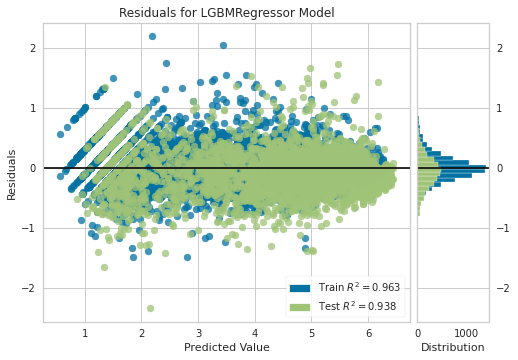

In [18]:
plot_model(tuned_lightgbm)

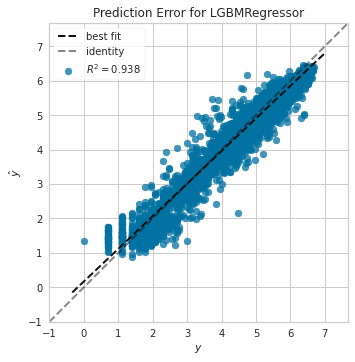

In [19]:
plot_model(tuned_lightgbm, plot="error")

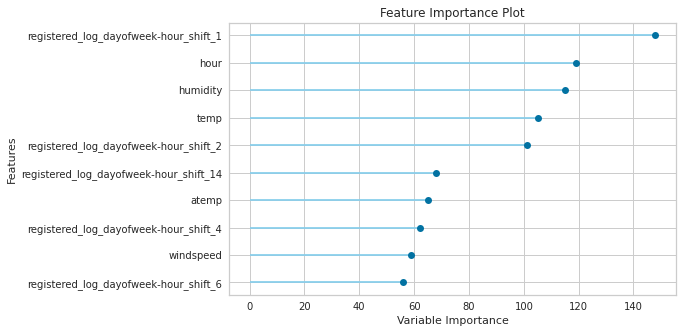

In [20]:
plot_model(tuned_lightgbm, plot="feature")

In [21]:
# 与えられたモデルで利用可能なすべてのプロットのユーザー・インターフェースをすべて表示
# Jupyter Labではevaluate_model()機能しないので注意
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 7.finalize_model()を実行し、モデルを確定
- finalize_model()関数は、完全なデータセットにモデルを適合させる（validation setなしってこと）
- この関数の目的は、本番で展開する前に、完全なデータセット上でモデルを訓練すること
- スタッキングなどのアンサンブルモデルでは可視化できないみたいなので注意

In [22]:
%%time

f_tune_models = []
for m, name in zip(tune_models, choice_ms):
    f_m = finalize_model(m)
    f_tune_models.append(f_m)
    save_model(f_m, model_name=os.path.join(output_dir, "pycaret_tuned_" + name))

print(f_tune_models)

Transformation Pipeline and Model Succesfully Saved
[<catboost.core.CatBoostRegressor object at 0x7f70b151fe10>, LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.2, max_depth=110,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=120, n_jobs=-1, num_leaves=20, objective=None,
              random_state=123, reg_alpha=0.6, reg_lambda=0.1, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)]
CPU times: user 5.66 s, sys: 2.05 s, total: 7.71 s
Wall time: 15.4 s


## 8.モデルのアンサンブルもできる

### blend_models()は複数のモデルの予測値を平均化して最終的な予測値を作成する
- メモリ足りないとjupyter落ちる

In [23]:
%%time

blend_specific = blend_models(f_tune_models)
# モデル保存
save_model(
    blend_specific, model_name=os.path.join(output_dir, "pycaret_blend_specific")
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5404,0.7327,0.8560,0.5352,0.2673,0.3299
1,0.2821,0.1654,0.4066,0.9030,0.1333,0.1226
2,0.2640,0.1296,0.3600,0.9264,0.1137,0.0992
3,0.2746,0.1426,0.3777,0.9170,0.0904,0.0805
4,0.2138,0.1025,0.3201,0.9406,0.0970,0.0712
5,0.1804,0.0633,0.2517,0.9606,0.0699,0.0546
6,0.2740,0.1717,0.4143,0.9038,0.1187,0.0870
7,0.2224,0.1027,0.3205,0.9418,0.0852,0.0764
8,0.2904,0.1836,0.4284,0.8945,0.1042,0.0972
9,0.3887,0.2902,0.5387,0.8427,0.1366,0.1362


Transformation Pipeline and Model Succesfully Saved
CPU times: user 1.11 s, sys: 269 ms, total: 1.38 s
Wall time: 1min 14s


### stack_models()でスタッキング（モデルを積み重ねる）
- メモリ足りないとjupyter落ちる

In [24]:
# help(stack_models)

In [25]:
%%time

stack_1 = stack_models(
    estimator_list=f_tune_models, finalize=True,  # finalize_model()で学習。デフォルトはFalse
)
# モデル保存
save_model(stack_1, model_name=os.path.join(output_dir, "pycaret_stack_1"))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5160,0.6216,0.7884,0.6073,0.2487,0.2995
1,0.2928,0.1730,0.4159,0.9027,0.1358,0.1212
2,0.3549,0.2013,0.4486,0.8848,0.1043,0.1002
3,0.2067,0.0910,0.3016,0.9442,0.0879,0.0626
4,0.3937,0.2903,0.5388,0.8338,0.1508,0.1202
5,0.3053,0.1807,0.4251,0.8971,0.1024,0.0999
6,0.4024,0.3017,0.5493,0.8357,0.1359,0.1346
7,0.3113,0.1581,0.3976,0.9223,0.1026,0.1063
8,0.2418,0.1165,0.3413,0.9422,0.0922,0.0793
9,0.2518,0.1121,0.3348,0.9368,0.0757,0.0696


Transformation Pipeline and Model Succesfully Saved
CPU times: user 1min 7s, sys: 25 s, total: 1min 32s
Wall time: 1min 26s


In [26]:
%%time

stack_meta = stack_models(
    estimator_list=f_tune_models[1:],
    meta_model=f_tune_models[0],  # 予測値を生成する最終モデル指定。デフォルトは線形回帰
    finalize=True,  # finalize_model()で学習。デフォルトはFalse
)
# モデル保存
save_model(stack_meta, model_name=os.path.join(output_dir, "pycaret_stack_meta"))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5123,0.5927,0.7699,0.6255,0.2423,0.2868
1,0.3058,0.1853,0.4304,0.8958,0.1374,0.1242
2,0.2858,0.1483,0.3851,0.9151,0.0931,0.0855
3,0.1909,0.0808,0.2843,0.9505,0.0845,0.0583
4,0.2576,0.1461,0.3822,0.9163,0.1072,0.0815
5,0.2589,0.1475,0.3841,0.9160,0.0952,0.0874
6,0.3817,0.3020,0.5496,0.8356,0.1350,0.1329
7,0.2838,0.1389,0.3727,0.9318,0.0983,0.1007
8,0.2325,0.1061,0.3258,0.9473,0.0852,0.0724
9,0.2074,0.0872,0.2953,0.9508,0.0698,0.0588


Transformation Pipeline and Model Succesfully Saved
CPU times: user 1min 3s, sys: 21.5 s, total: 1min 24s
Wall time: 1min 25s


## 9.モデルで予測

In [27]:
# predict_modelは実運用のtestセットで使われる
predictions = predict_model(tuned_lightgbm, data=df_test)

# 予測結果のLabel列とScore列ができる
display(predictions.head())

,datetime,temp,atemp,humidity,windspeed,count_season_mid,season,holiday,workingday,weather,...,registered_log_dayofweek-hour_shift_25,registered_log_dayofweek-hour_shift_26,registered_log_dayofweek-hour_shift_3,registered_log_dayofweek-hour_shift_4,registered_log_dayofweek-hour_shift_5,registered_log_dayofweek-hour_shift_6,registered_log_dayofweek-hour_shift_7,registered_log_dayofweek-hour_shift_8,registered_log_dayofweek-hour_shift_9,Label
0,2012-07-01 00:00:00,0.76,0.7273,0.66,0.0000,169,3,0,0,1,...,4.356709,3.784190,4.836282,4.962845,4.499810,4.859812,4.382027,4.718499,3.610918,4.7760
1,2012-07-01 01:00:00,0.74,0.6970,0.70,0.1343,169,3,0,0,1,...,4.143135,4.369448,4.442651,4.615121,4.127134,4.634729,4.290459,4.442651,3.637586,4.4728
2,2012-07-01 02:00:00,0.72,0.6970,0.74,0.0896,169,3,0,0,1,...,4.094345,1.098612,4.043051,4.219508,3.828641,4.143135,4.110874,4.174387,3.610918,4.1902
3,2012-07-01 03:00:00,0.72,0.7121,0.84,0.1343,169,3,0,0,1,...,3.295837,3.737670,3.178054,3.555348,3.258097,3.713572,3.295837,2.995732,2.708050,3.5326
4,2012-07-01 04:00:00,0.70,0.6667,0.79,0.1940,169,3,0,0,1,...,1.609438,2.197225,2.302585,2.564949,2.079442,2.708050,2.079442,2.079442,1.609438,2.7148


In [28]:
predictions = predict_model(stack_meta, data=df_test)
display(predictions.head())

,datetime,temp,atemp,humidity,windspeed,count_season_mid,season,holiday,workingday,weather,...,registered_log_dayofweek-hour_shift_25,registered_log_dayofweek-hour_shift_26,registered_log_dayofweek-hour_shift_3,registered_log_dayofweek-hour_shift_4,registered_log_dayofweek-hour_shift_5,registered_log_dayofweek-hour_shift_6,registered_log_dayofweek-hour_shift_7,registered_log_dayofweek-hour_shift_8,registered_log_dayofweek-hour_shift_9,Label
0,2012-07-01 00:00:00,0.76,0.7273,0.66,0.0000,169,3,0,0,1,...,4.356709,3.784190,4.836282,4.962845,4.499810,4.859812,4.382027,4.718499,3.610918,4.7832
1,2012-07-01 01:00:00,0.74,0.6970,0.70,0.1343,169,3,0,0,1,...,4.143135,4.369448,4.442651,4.615121,4.127134,4.634729,4.290459,4.442651,3.637586,4.5555
2,2012-07-01 02:00:00,0.72,0.6970,0.74,0.0896,169,3,0,0,1,...,4.094345,1.098612,4.043051,4.219508,3.828641,4.143135,4.110874,4.174387,3.610918,4.1647
3,2012-07-01 03:00:00,0.72,0.7121,0.84,0.1343,169,3,0,0,1,...,3.295837,3.737670,3.178054,3.555348,3.258097,3.713572,3.295837,2.995732,2.708050,3.5183
4,2012-07-01 04:00:00,0.70,0.6667,0.79,0.1940,169,3,0,0,1,...,1.609438,2.197225,2.302585,2.564949,2.079442,2.708050,2.079442,2.079442,1.609438,2.5880


## 10.モデルの保存/実験の保存

### モデルのデプロイ

In [29]:
## トレーニング済みモデルを含むパイプライン全体を、ノートブック環境からクラウドにデプロイできます
# deploy_model(model = rf, model_name = 'rf_aws', platform = 'aws',
#             authentication =  {'bucket'  : 'pycaret-test'})

### モデルをpklファイルに保存
#### <span style="color: red; ">load_model()はsetup()実行してからでないとエラーになる</span>

In [30]:
# すべての前処理変換とトレーニング済みのモデルオブジェクトを含むパイプライン全体をバイナリpklファイルとして保存
# saving model(./ada_for_deployment.pklができる)

# load_modelでロードできる
model = load_model(os.path.join(output_dir, "pycaret_tuned_lightgbm"))
predict_model(model, data=df_test)

,datetime,temp,atemp,humidity,windspeed,count_season_mid,season,holiday,workingday,weather,...,registered_log_dayofweek-hour_shift_25,registered_log_dayofweek-hour_shift_26,registered_log_dayofweek-hour_shift_3,registered_log_dayofweek-hour_shift_4,registered_log_dayofweek-hour_shift_5,registered_log_dayofweek-hour_shift_6,registered_log_dayofweek-hour_shift_7,registered_log_dayofweek-hour_shift_8,registered_log_dayofweek-hour_shift_9,Label
0,2012-07-01 00:00:00,0.76,0.7273,0.66,0.0000,169,3,0,0,1,...,4.356709,3.784190,4.836282,4.962845,4.499810,4.859812,4.382027,4.718499,3.610918,4.8635
1,2012-07-01 01:00:00,0.74,0.6970,0.70,0.1343,169,3,0,0,1,...,4.143135,4.369448,4.442651,4.615121,4.127134,4.634729,4.290459,4.442651,3.637586,4.4823
2,2012-07-01 02:00:00,0.72,0.6970,0.74,0.0896,169,3,0,0,1,...,4.094345,1.098612,4.043051,4.219508,3.828641,4.143135,4.110874,4.174387,3.610918,4.1403
3,2012-07-01 03:00:00,0.72,0.7121,0.84,0.1343,169,3,0,0,1,...,3.295837,3.737670,3.178054,3.555348,3.258097,3.713572,3.295837,2.995732,2.708050,3.5068
4,2012-07-01 04:00:00,0.70,0.6667,0.79,0.1940,169,3,0,0,1,...,1.609438,2.197225,2.302585,2.564949,2.079442,2.708050,2.079442,2.079442,1.609438,2.6393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,2012-12-31 19:00:00,0.26,0.2576,0.60,0.1642,77,1,0,1,2,...,NaN,6.232448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7152
4372,2012-12-31 20:00:00,0.26,0.2576,0.60,0.1642,77,1,0,1,2,...,NaN,5.929589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1192
4373,2012-12-31 21:00:00,0.26,0.2576,0.60,0.1642,77,1,0,1,1,...,NaN,5.641907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0301
4374,2012-12-31 22:00:00,0.26,0.2727,0.56,0.1343,77,1,0,1,1,...,NaN,5.117994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8957


### 構築したすべての出力とモデルを含む実験全体をpklファイルとして保存することもできる
#### <span style="color: red; ">load_experiment()はsetup()実行してからでないとエラーになる</span>

In [31]:
# ./my_first_experiment.pklができる
# save_experiment(os.path.join(output_dir, 'pycaret_my_first_experiment'))

In [32]:
# load_experimentでロードできる
# 実験全体とすべての中間出力が変数saved_experimentにロードされる
# saved_experiment = load_experiment(os.path.join(output_dir, 'pycaret_my_first_experiment'))

In [33]:
# loaded_model = saved_experiment[31]
# new_prediction = predict_model(loaded_model,
#                               data=df_test,
#                               round=1  # Label列の有効数字小数第2位までにする
#                              )
# new_prediction.head()

### submission.csv作成

In [34]:
def output_submit(model, submit_csv, data=df_test):
    """submission.csv作成"""
    print("data.shape:", data.shape)
    predictions = predict_model(model, data=data)

    # 対数化を戻す
    predictions["Label"] = predictions["Label"].apply(np.expm1)

    ## datetime列取り出す
    # df_test_orig = pd.read_csv(os.path.join(data_dir, 'test.csv'), parse_dates=['datetime'])

    # df_pred_submit = pd.concat([df_test_orig['datetime'], predictions['Label']], axis=1)
    df_pred_submit = predictions[["datetime", "Label"]].copy()
    df_pred_submit = df_pred_submit.rename(columns={"Label": "cnt"})

    # inf対策
    df_pred_submit["cnt"] = (
        df_pred_submit["cnt"].replace([np.inf, -np.inf], np.nan).fillna(0.0)
    )

    df_pred_submit.loc[df_pred_submit["cnt"] < 0, "cnt"] = 0  # マイナスの値は0にする
    df_pred_submit.to_csv(submit_csv, index=False)
    return df_pred_submit


if "catboost" in choice_ms:
    loaded_model = load_model(os.path.join(output_dir, "pycaret_tuned_catboost"))
    df_pred_submit = output_submit(
        loaded_model, os.path.join(output_dir, "tuned_catboost.csv")
    )
    display(df_pred_submit)

if "lightgbm" in choice_ms:
    loaded_model = load_model(os.path.join(output_dir, "pycaret_tuned_lightgbm"))
    df_pred_submit = output_submit(
        loaded_model, os.path.join(output_dir, "tuned_lightgbm.csv")
    )
    display(df_pred_submit)

loaded_model = load_model(os.path.join(output_dir, "pycaret_blend_specific"))
df_pred_submit = output_submit(loaded_model, os.path.join(output_dir, "blend.csv"))
display(df_pred_submit)

loaded_model = load_model(os.path.join(output_dir, "pycaret_stack_1"))
df_pred_submit = output_submit(loaded_model, os.path.join(output_dir, "stack_1.csv"))
display(df_pred_submit)

loaded_model = load_model(os.path.join(output_dir, "pycaret_stack_meta"))
df_pred_submit = output_submit(loaded_model, os.path.join(output_dir, "stack_meta.csv"))
display(df_pred_submit)

,datetime,cnt
0,2012-07-01 00:00:00,118.486094
1,2012-07-01 01:00:00,94.154321
2,2012-07-01 02:00:00,63.373368
3,2012-07-01 03:00:00,32.727044
4,2012-07-01 04:00:00,12.303139
...,...,...
4371,2012-12-31 19:00:00,119.457862
4372,2012-12-31 20:00:00,64.680364
4373,2012-12-31 21:00:00,64.026833
4374,2012-12-31 22:00:00,51.383937


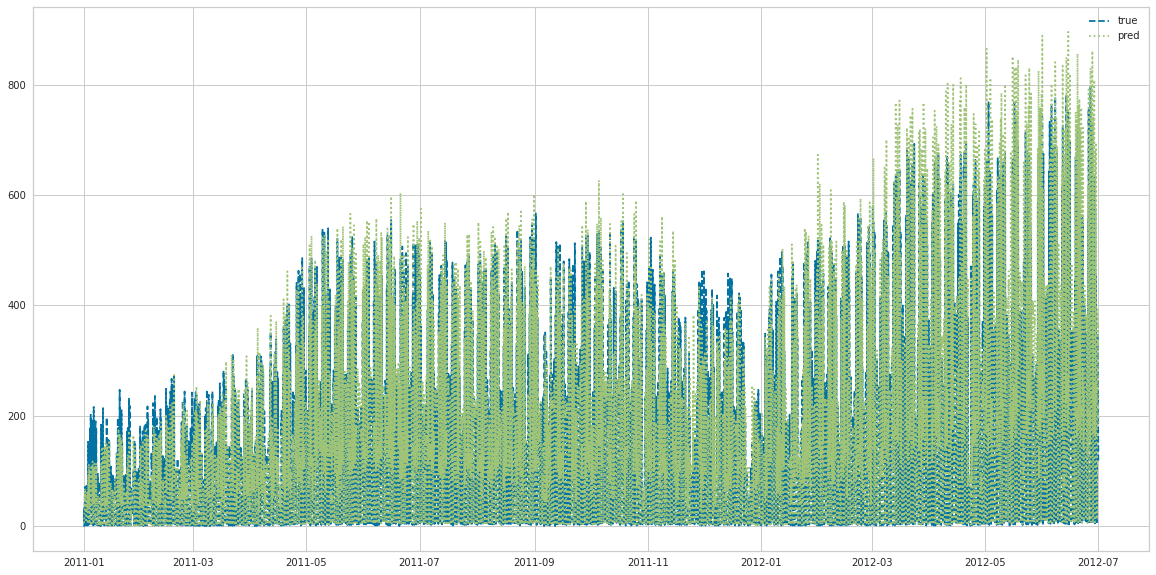

In [35]:
def ts_plot_trainset_true_pred(model, df_train):
    """横軸時系列でtrain setの正解と予測plot"""
    # pd.options.plotting.backend = "plotly"  # pandas plot をplotly化できなかった。。。

    df_pred = predict_model(model, data=df_train)
    # 対数化を戻す
    df_pred["Label"] = df_pred["Label"].apply(np.expm1)

    # 対数化を戻す
    df_train["count"] = df_train[_target].apply(np.expm1)
    # df_train['count_registered_ymdh_mean'] = df_train['count_registered_ymdh_mean'].apply(np.expm1)
    # df_train['count_casual_ymdh_mean'] = df_train['count_casual_ymdh_mean'].apply(np.expm1)
    # df_train['count_month_mean'] = df_train['count_month_mean'].apply(np.expm1)
    # df_train['count_month_std'] = df_train['count_month_std'].apply(np.expm1)
    # df_train['count_shift'] = df_train['count_shift'].apply(np.expm1)

    df_pred["datetime"] = pd.to_datetime(
        df_pred["datetime"], format="%Y-%m-%d %H:%M:%S"
    )  # datetime型に変換
    df_train["datetime"] = pd.to_datetime(
        df_train["datetime"], format="%Y-%m-%d %H:%M:%S"
    )  # datetime型に変換

    # 正解と予測の結果csvも出す
    pd.concat([df_train, df_pred[["Label"]]], axis=1).to_csv(
        os.path.join(output_dir, "train_pred.csv"), index=False
    )

    fig = plt.figure(figsize=(20, 10))
    # df_train.plot(x="datetime", y='count')
    # df_pred.plot(x="datetime", y='Label')
    plt.plot(df_train["datetime"], df_train["count"], linestyle="dashed", label="true")
    plt.plot(df_pred["datetime"], df_pred["Label"], linestyle="dotted", label="pred")
    # sns.lineplot(data=df_train, x="datetime", y='count', color='red', label='train', markers="-")
    # sns.lineplot(data=df_pred, x="datetime", y='Label', color='blue', label='pred_train')
    plt.legend()
    plt.show()
    return


loaded_model = load_model(os.path.join(output_dir, "pycaret_stack_1"))
ts_plot_trainset_true_pred(loaded_model, df_train)

## submitファイル足し算

In [36]:
import os
import pathlib
import pandas as pd


def blend_submit_csv(csvs: list, ratios: list, output_dir: str):
    """submit.csvの目的変数をブレンドする（ratioを掛けて混ぜる）"""
    dfs = [pd.read_csv(c) for c in csvs]
    pred = None
    for r, df in zip(ratios, dfs):
        _p = r * df["cnt"]
        pred = _p if pred is None else pred + _p
    print(pred)
    submission = pd.DataFrame({"datetime": dfs[0]["datetime"], "cnt": pred})
    save_csv = os.path.join(output_dir, "blend_" + pathlib.Path(csvs[0]).stem + ".csv")
    submission.to_csv(save_csv, index=False)
    print(f"INFO: save csv: {save_csv}")
    print()


output_dir = "model/pycaret_regression"
for csv in [
    "tuned_catboost.csv",
    "tuned_lightgbm.csv",
    "stack_meta.csv",
    "stack_1.csv",
    "blend.csv",
]:
    csv1 = output_dir + "/casual/" + csv
    csv2 = output_dir + "/registered/" + csv
    csvs = [csv1, csv2]
    ratios = [1.0, 1.0]
    blend_submit_csv(csvs, ratios, output_dir)

0       151.259403
1       108.672227
2        76.609033
3        46.003644
4        14.093109
           ...    
4371     78.397062
4372     59.512599
4373     58.741492
4374     53.970300
4375     48.279072
Name: cnt, Length: 4376, dtype: float64
INFO: save csv: model/pycaret_regression/blend_tuned_catboost.csv

0       159.835831
1       116.366011
2        85.244047
3        42.098870
4        15.074695
           ...    
4371    114.271533
4372     63.823300
4373     58.854794
4374     51.617819
4375     39.026279
Name: cnt, Length: 4376, dtype: float64
INFO: save csv: model/pycaret_regression/blend_tuned_lightgbm.csv

0       157.450932
1       118.616648
2        82.330767
3        43.954696
4        14.045721
           ...    
4371    120.788635
4372     66.193923
4373     65.151468
4374     52.077780
4375     35.495384
Name: cnt, Length: 4376, dtype: float64
INFO: save csv: model/pycaret_regression/blend_stack_meta.csv

0       175.274802
1       130.623232
2        89.088692